# Más Álgebra lineal con Python

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](http://relopezbriega.com.ar/) en [Matemáticas, análisis de datos y python](http://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Algebra lineal" title="Algebra lineal" src="http://relopezbriega.github.io/images/lin-alg.jpg">

## Introducción

El [Álgebra lineal](http://relopezbriega.github.io/tag/algebra.html) constituye la base de gran parte de las matemáticas modernas, ya sea en su fase teórica, aplicada, o computacional. Es un área activa que tiene conexiones con muchas áreas dentro y fuera de las matemáticas, como ser: el [análisis funcional](https://es.wikipedia.org/wiki/An%C3%A1lisis_funcional), las [ecuaciones diferenciales](http://relopezbriega.github.io/tag/ecuaciones-diferenciales.html), la [investigación operativa](https://es.wikipedia.org/wiki/Investigaci%C3%B3n_de_operaciones), la [econometría](https://es.wikipedia.org/wiki/Econometr%C3%ADa) y la [ingeniería](https://es.wikipedia.org/wiki/Ingenier%C3%ADa). Es por esto, que se vuelve sumamente importante conocer sus métodos en profundidad. 

La idea de este artículo, es profundizar alguno de los temas que ya vimos en mi artículo anterior ([Álgebra lineal con Python](http://relopezbriega.github.io/blog/2015/06/14/algebra-lineal-con-python/)), presentar algunos nuevos, e ilustrar la utilidad de esta rama de la matemáticas con alguna de sus aplicaciones.


## Campos

Un <a href="https://es.wikipedia.org/wiki/Cuerpo_(matem%C3%A1ticas)">Campo</a>, $F$, es una [estructura algebraica](https://es.wikipedia.org/wiki/Estructura_algebraica) en la cual las operaciones de <a href="https://es.wikipedia.org/wiki/Adici%C3%B3n_(matem%C3%A1ticas)">adición</a> y [multiplicación](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n) se pueden realizar y cumplen con las siguientes propiedades: 

1. La [propiedad conmutativa](https://es.wikipedia.org/wiki/Conmutatividad) tanto para la <a href="https://es.wikipedia.org/wiki/Adici%C3%B3n_(matem%C3%A1ticas)">adición</a> como para la [multiplicación](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n); es decir: $a + b = b + a$; y $a \cdot b = b \cdot a$; para todo $a, b \in F$ 

2. La <a href="https://es.wikipedia.org/wiki/Asociatividad_(%C3%A1lgebra)">propiedad asociativa</a>, tanto para la <a href="https://es.wikipedia.org/wiki/Adici%C3%B3n_(matem%C3%A1ticas)">adición</a> como para la [multiplicación](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n); es decir: $(a + b) + c = a + (b + c)$; y $(a \cdot b) \cdot c = a \cdot (b \cdot c)$; para todo $a, b, c \in F$ 

3. La [propiedad distributiva](https://es.wikipedia.org/wiki/Distributividad) de la [multiplicación](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n) sobre la <a href="https://es.wikipedia.org/wiki/Adici%C3%B3n_(matem%C3%A1ticas)">adición</a>; es decir: $a \cdot (b + c) = a \cdot b + a \cdot c$; para todo $a, b, c \in F$ 

4. La existencia de un *[elemento neutro](https://es.wikipedia.org/wiki/Elemento_neutro)* tanto para la <a href="https://es.wikipedia.org/wiki/Adici%C3%B3n_(matem%C3%A1ticas)">adición</a> como para la [multiplicación](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n); es decir: $a + 0 = a$; y $a \cdot 1 = a$; para todo $a \in F$.

5. La existencia de un *[elemento inverso](https://es.wikipedia.org/wiki/Elemento_sim%C3%A9trico)* tanto para la <a href="https://es.wikipedia.org/wiki/Adici%C3%B3n_(matem%C3%A1ticas)">adición</a> como para la [multiplicación](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n); es decir: $a + (-a) = 0$; y $a \cdot a^{-1} = 1$; para todo $a \in F$ y $a \ne 0$.

Dos de los <a href="https://es.wikipedia.org/wiki/Cuerpo_(matem%C3%A1ticas)">Campos</a> más comunes con los que nos vamos a encontrar al trabajar en problemas de [Álgebra lineal](http://relopezbriega.github.io/tag/algebra.html), van a ser el [conjunto](http://relopezbriega.github.io/blog/2015/10/11/conjuntos-con-python/) de los [números reales](https://es.wikipedia.org/wiki/N%C3%BAmero_real), $\mathbb{R}$; y el [conjunto](http://relopezbriega.github.io/blog/2015/10/11/conjuntos-con-python/) de los [números complejos](http://relopezbriega.github.io/blog/2015/10/12/numeros-complejos-con-python/), $\mathbb{C}$.

## Vectores

Muchas nociones físicas, tales como las fuerzas, velocidades y aceleraciones, involucran una magnitud (el valor de la fuerza, velocidad o aceleración) y una dirección. Cualquier entidad que involucre magnitud y dirección se llama [vector](http://es.wikipedia.org/wiki/Vector). Los [vectores](http://es.wikipedia.org/wiki/Vector) se representan por flechas en las que la longitud de ellas define la magnitud; y la dirección de la flecha representa la dirección del [vector](http://es.wikipedia.org/wiki/Vector). Podemos pensar en los [vectores](http://es.wikipedia.org/wiki/Vector) como una serie de números. Éstos números tienen una orden preestablecido, y podemos identificar cada número individual por su índice en ese orden. Los [vectores](http://es.wikipedia.org/wiki/Vector) identifican puntos en el espacio, en donde cada elemento representa una coordenada del eje en el espacio. La típica forma de representarlos es la siguiente:

$$v = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_n \end{array} \right]$$

Geométricamente podemos representarlos del siguiente modo en el plano de 2 dimensiones:

In [1]:
# <!-- collapse=True -->
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg
import scipy.linalg as la
import sympy

# imprimir con notación matemática.
sympy.init_printing(use_latex='mathjax')

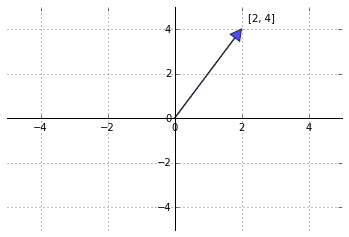

In [2]:
# <!-- collapse=True -->
# graficando vector en R^2 [2, 4]
def move_spines():
    """Crea la figura de pyplot y los ejes. Mueve las lineas de la izquierda 
    y de abajo para que se intersecten con el origen. Elimina las lineas de
    la derecha y la de arriba. Devuelve los ejes."""
    fix, ax = plt.subplots()
    for spine in ["left", "bottom"]:
        ax.spines[spine].set_position("zero")
    
    for spine in ["right", "top"]:
        ax.spines[spine].set_color("none")
    
    return ax

def vect_fig(vector, color): 
    """Genera el grafico de los vectores en el plano"""
    v = vector
    ax.annotate(" ", xy=v, xytext=[0, 0], color=color,
                arrowprops=dict(facecolor=color,
                                shrink=0,
                                alpha=0.7,
                                width=0.5))
    ax.text(1.1 * v[0], 1.1 * v[1], v)

ax = move_spines()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid()
vect_fig([2, 4], "blue")

## Combinaciones lineales

Cuando trabajamos con [vectores](http://es.wikipedia.org/wiki/Vector), nos vamos a encontrar con dos operaciones fundamentales, la *suma* o *<a href="https://es.wikipedia.org/wiki/Adici%C3%B3n_(matem%C3%A1ticas)">adición</a>*; y la *multiplicación por <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a>*. Cuando *sumamos* dos vectores $v$ y $w$, sumamos elemento por elemento, del siguiente modo:

$$v + w
=
\left[
\begin{array}{c}
    v_1 \\
    v_2 \\
    \vdots \\
    v_n
\end{array}
\right]
+
\left[
\begin{array}{c}
     w_1 \\
     w_2 \\
    \vdots \\
     w_n
\end{array}
\right] =
\left[
\begin{array}{c}
    v_1 + w_1 \\
    v_2 + w_2 \\
    \vdots \\
    v_n + w_n
\end{array}
\right]$$

Geométricamente lo podemos ver representado del siguiente modo:

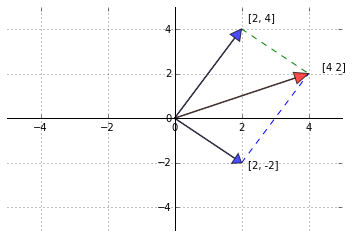

In [3]:
# <!-- collapse=True -->
# graficando suma de vectores en R^2
# [2, 4] + [2, -2]

ax = move_spines()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid()
vecs = [[2, 4], [2, -2]] # lista de vectores
for v in vecs:
    vect_fig(v, "blue")

v = np.array([2, 4]) + np.array([2, -2])
vect_fig(v, "red")

ax.plot([2, 4], [-2, 2], linestyle='--')
a =ax.plot([2, 4], [4, 2], linestyle='--' )

Cuando *multiplicamos [vectores](http://es.wikipedia.org/wiki/Vector) por <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a>*, lo que hacemos es tomar un número $\alpha$ y un [vector](http://es.wikipedia.org/wiki/Vector) $v$; y creamos un nuevo [vector](http://es.wikipedia.org/wiki/Vector) $w$ en el cada elemento de $v$ es *multiplicado* por $\alpha$ del siguiente modo:

$$\begin{split}\alpha v
=
\left[
\begin{array}{c}
    \alpha v_1 \\
    \alpha v_2 \\
    \vdots \\
    \alpha v_n
\end{array}
\right]\end{split}$$

Geométricamente podemos representar a esta operación en el plano de 2 dimensiones del siguiente modo:

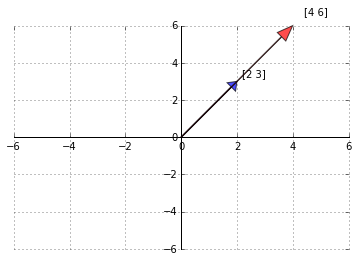

In [4]:
# <!-- collapse=True -->
# graficando multiplicación por escalares en R^2
# [2, 3] * 2

ax = move_spines()
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.grid()

v = np.array([2, 3])
vect_fig(v, "blue")

v = v * 2
vect_fig(v, "red")

Cuando combinamos estas dos operaciones, formamos lo que se conoce en [Álgebra lineal](http://relopezbriega.github.io/tag/algebra.html) como [combinaciones lineales](https://es.wikipedia.org/wiki/Combinaci%C3%B3n_lineal). Es decir que una [combinación lineal](https://es.wikipedia.org/wiki/Combinaci%C3%B3n_lineal) va a ser una expresión matemática construida sobre un conjunto de [vectores](http://es.wikipedia.org/wiki/Vector), en el que cada vector es *multiplicado por un <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalar</a>* y los resultados son luego *sumados*. Matemáticamente lo podemos expresar de la siguiente forma:

$$w = \alpha_1 v_1 + \alpha_2 v_2 + \dots + \alpha_n v_n = \sum_{i=1}^n \alpha_i v_i
$$

en donde, $v_n$ son [vectores](http://es.wikipedia.org/wiki/Vector) y $\alpha_n$ son <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a>.

## Matrices, combinaciones lineales y Ax = b

Una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> es un arreglo bidimensional de números ordenados en filas y columnas, donde una fila es cada una de las líneas horizontales de la matriz y una columna es cada una de las líneas verticales. En una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> cada elemento puede ser identificado utilizando dos índices, uno para la fila y otro para la columna en que se encuentra. Las podemos representar de la siguiente manera:

$$A=\begin{bmatrix}a_{11} & a_{12} & \dots & a_{1n}\\a_{21} & a_{22} & \dots & a_{2n}
\\ \vdots & \vdots & \ddots & \vdots \\ 
a_{n1} & a_{n2} & \dots & a_{nn}\end{bmatrix}$$

Las <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matrices</a> se utilizan para múltiples aplicaciones y sirven, en particular, para representar los coeficientes de los [sistemas de ecuaciones lineales](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales) o para representar [combinaciones lineales](https://es.wikipedia.org/wiki/Combinaci%C3%B3n_lineal).

Supongamos que tenemos los siguientes 3 vectores:

$$x_1
=
\left[
\begin{array}{c}
     1 \\
    -1 \\
     0
\end{array}
\right]
\
x_2 =
\left[
\begin{array}{c}
     0 \\
     1 \\
    -1 
\end{array}
\right] \ 
x_3 =
\left[
\begin{array}{c}
    0 \\
    0 \\
    1
\end{array}
\right]$$

su [combinación lineal](https://es.wikipedia.org/wiki/Combinaci%C3%B3n_lineal) en el espacio de 3 dimensiones va a ser igual a $\alpha_1 x_1 + \alpha_2 x_2 + \alpha_3 x_3$; lo que es lo mismo que decir:

$$\alpha_1
\left[
\begin{array}{c}
     1 \\
    -1 \\
     0
\end{array}
\right]
+ \alpha_2
\left[
\begin{array}{c}
     0 \\
     1 \\
    -1 
\end{array}
\right] + \alpha_3
\left[
\begin{array}{c}
    0 \\
    0 \\
    1
\end{array}
\right] = \left[
\begin{array}{c}
    \alpha_1 \\
    \alpha_2 - \alpha_1 \\
    \alpha_3 - \alpha_2
\end{array}
\right]$$

Ahora esta [combinación lineal](https://es.wikipedia.org/wiki/Combinaci%C3%B3n_lineal) la podríamos reescribir en forma matricial. Los vectores $x_1, x_2$ y $x_3$, pasarían a formar las columnas de la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$ y los <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a> $\alpha_1, \alpha_2$ y $\alpha_3$ pasarían a ser los componentes del [vector](http://es.wikipedia.org/wiki/Vector) $x$ del siguiente modo:

$$\begin{bmatrix}1 & 0 & 0\\-1 & 1 & 0
\\ 0 & -1 & 1\end{bmatrix}\begin{bmatrix} \alpha_1 \\ \alpha_2 \\ \alpha_3\end{bmatrix}=
\begin{bmatrix}\alpha_1 \\ \alpha_2 - \alpha_1 \\ \alpha_3 - \alpha_2 \end{bmatrix}$$

De esta forma la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$ multiplicada por el [vector](http://es.wikipedia.org/wiki/Vector) $x$, nos da como resultado la misma [combinación lineal](https://es.wikipedia.org/wiki/Combinaci%C3%B3n_lineal) $b$. De esta forma, arribamos a una de las ecuaciones más fundamentales del [Álgebra lineal](http://relopezbriega.github.io/tag/algebra.html):

$$Ax = b$$

Esta ecuación no solo nos va a servir para expresar [combinaciones lineales](https://es.wikipedia.org/wiki/Combinaci%C3%B3n_lineal), sino que también se vuelve de suma importancia a la hora de resolver [sistemas de ecuaciones lineales](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales), en dónde $b$ va a ser conocido y la incógnita pasa a ser $x$. Por ejemplo, supongamos que queremos resolver el siguiente [sistemas de ecuaciones](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales) de 3 incógnitas:

$$ 2x_1 + 3x_2 + 5x_3 = 52 \\
3x_1 + 6x_2 + 2x_3 = 61 \\
8x_1 + 3x_2 + 6x_3 = 75
$$

Podemos ayudarnos de [SymPy](http://www.sympy.org/es/) para expresar a la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$ y $b$ para luego arribar a la solución del [vector](http://es.wikipedia.org/wiki/Vector) $x$.

In [5]:
# Resolviendo sistema de ecuaciones con SymPy
A = sympy.Matrix(( (2, 3, 5), (3, 6, 2), (8, 3, 6) ))
A

⎡2  3  5⎤
⎢       ⎥
⎢3  6  2⎥
⎢       ⎥
⎣8  3  6⎦

In [6]:
b = sympy.Matrix(3,1,(52,61,75))
b

⎡52⎤
⎢  ⎥
⎢61⎥
⎢  ⎥
⎣75⎦

In [7]:
# Resolviendo Ax = b
x = A.LUsolve(b)
x

⎡3⎤
⎢ ⎥
⎢7⎥
⎢ ⎥
⎣5⎦

In [8]:
# Comprobando la solución
A*x

⎡52⎤
⎢  ⎥
⎢61⎥
⎢  ⎥
⎣75⎦

## La matriz  identidad , la matriz transpuesta y la matriz invertible

Tres <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matrices</a> de suma importancia en problemas de [Álgebra lineal](http://relopezbriega.github.io/tag/algebra.html). Son la [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad), la [matriz transpuesta](http://es.wikipedia.org/wiki/Matriz_transpuesta) y la [matriz invertible](https://es.wikipedia.org/wiki/Matriz_invertible).

La [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) es el elemento neutro en la [multiplicación de matrices](https://es.wikipedia.org/wiki/Multiplicaci%C3%B3n_de_matrices), es el equivalente al número 1. Cualquier <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> multiplicada por la [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) nos da como resultado la misma <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a>. La [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) es una [matriz cuadrada](https://es.wikipedia.org/wiki/Matriz_cuadrada) (tiene siempre el mismo número de filas que de columnas); y su diagonal principal se compone de todos elementos 1 y el resto de los elementos se completan con 0. Suele representase con la letra $I$.

Por ejemplo la [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) de 3x3 sería la siguiente:

$$I=\begin{bmatrix}1 & 0 & 0 & \\0 & 1 & 0\\ 0 & 0 & 1\end{bmatrix}$$

La [matriz transpuesta](http://es.wikipedia.org/wiki/Matriz_transpuesta) de una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$ de $m \times n$ va a ser igual a la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $n \times m$ $A^T$, la cual se obtiene al transformar las filas en columnas y las columnas en filas, del siguiente modo:

$$\begin{bmatrix}a & b & \\c & d & \\ e & f & \end{bmatrix}^T=
\begin{bmatrix}a & c & e &\\b & d & f & \end{bmatrix}$$

Una [matriz cuadrada](https://es.wikipedia.org/wiki/Matriz_cuadrada) va a ser *[simétrica](https://es.wikipedia.org/wiki/Matriz_sim%C3%A9trica)* si $A^T = A$, es decir si $A$ es igual a su propia [matriz transpuesta](http://es.wikipedia.org/wiki/Matriz_transpuesta).

Algunas de las propiedades de las [matrices transpuestas](http://es.wikipedia.org/wiki/Matriz_transpuesta) son:

a. $(A^T)^T = A$

b. $(A + B)^T = A^T + B^T$

c. $k(A)^T = k(A^T)$

d. $(AB)^T = B^T A^T$

e. $(A^r)^T = (A^T)^r$ para todos los $r$ no negativos.

f. Si $A$ es una [matriz cuadrada](https://es.wikipedia.org/wiki/Matriz_cuadrada), entonces $A + A^T$ es una [matriz simétrica](https://es.wikipedia.org/wiki/Matriz_sim%C3%A9trica).

g. Para cualquier <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$, $A A^T$ y $A^T A$ son [matrices simétricas](https://es.wikipedia.org/wiki/Matriz_sim%C3%A9trica).

Veamos algunos ejemplos en [Python](http://python.org/)

In [9]:
# Matriz transpuesta
A = sympy.Matrix( [[ 2,-3,-8, 7],
                   [-2,-1, 2,-7],
                   [ 1, 0,-3, 6]] )
A

⎡2   -3  -8  7 ⎤
⎢              ⎥
⎢-2  -1  2   -7⎥
⎢              ⎥
⎣1   0   -3  6 ⎦

In [10]:
A.transpose()

⎡2   -2  1 ⎤
⎢          ⎥
⎢-3  -1  0 ⎥
⎢          ⎥
⎢-8  2   -3⎥
⎢          ⎥
⎣7   -7  6 ⎦

In [11]:
# transpuesta de transpuesta vuelve a A.
A.transpose().transpose()

⎡2   -3  -8  7 ⎤
⎢              ⎥
⎢-2  -1  2   -7⎥
⎢              ⎥
⎣1   0   -3  6 ⎦

In [12]:
# creando matriz simetrica
As = A*A.transpose()
As

⎡126  -66  68 ⎤
⎢             ⎥
⎢-66  58   -50⎥
⎢             ⎥
⎣68   -50  46 ⎦

In [13]:
# comprobando simetria.
As.transpose()

⎡126  -66  68 ⎤
⎢             ⎥
⎢-66  58   -50⎥
⎢             ⎥
⎣68   -50  46 ⎦

La [matriz invertible](https://es.wikipedia.org/wiki/Matriz_invertible) es muy importante, ya que esta relacionada con la ecuación $Ax = b$. Si tenemos una [matriz cuadrada](https://es.wikipedia.org/wiki/Matriz_cuadrada) $A$ de $n \times n$, entonces la [matriz inversa](https://es.wikipedia.org/wiki/Matriz_invertible) de $A$ es una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A'$ o $A^{-1}$ de $n \times n$ que hace que la multiplicación $A A^{-1}$ sea igual a la [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) $I$. Es decir que es la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> recíproca de $A$.

$A A^{-1} = I$ o $A^{-1} A = I$

En caso de que estas condiciones se cumplan, decimos que la [matriz es invertible](https://es.wikipedia.org/wiki/Matriz_invertible). 

Que una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> sea [invertible](https://es.wikipedia.org/wiki/Matriz_invertible) tiene importantes implicaciones, como ser:

a. Si $A$ es una [matriz invertible](https://es.wikipedia.org/wiki/Matriz_invertible), entonces su [matriz inversa](https://es.wikipedia.org/wiki/Matriz_invertible) es única.

b. Si $A$ es una [matriz invertible](https://es.wikipedia.org/wiki/Matriz_invertible) de $n \times n$, entonces el [sistemas de ecuaciones lineales](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales) dado por $Ax = b$ tiene una única solución $x = A^{-1}b$ para cualquier $b$ en $\mathbb{R}^n$.

c. Una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> va a ser [invertible](https://es.wikipedia.org/wiki/Matriz_invertible) si y solo si su <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> es distinto de cero. En el caso de que el <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> sea cero se dice que la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> es singular.

d. Si $A$ es una [matriz invertible](https://es.wikipedia.org/wiki/Matriz_invertible), entonces el [sistema](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales) $Ax = 0$ solo tiene una solución *trivial*. Es decir, en las que todas las incógnitas son ceros.

e. Si $A$ es una [matriz invertible](https://es.wikipedia.org/wiki/Matriz_invertible), entonces su [forma escalonada](https://es.wikipedia.org/wiki/Matriz_escalonada) va a ser igual a la [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad).

f. Si $A$ es una [matriz invertible](https://es.wikipedia.org/wiki/Matriz_invertible), entonces $A^{-1}$ es [invertible](https://es.wikipedia.org/wiki/Matriz_invertible) y:

$$(A^{-1})^{-1} = A$$

g. Si $A$ es una [matriz invertible](https://es.wikipedia.org/wiki/Matriz_invertible) y $\alpha$ es un  <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalar</a> distinto de cero, entonces $\alpha A$ es [invertible](https://es.wikipedia.org/wiki/Matriz_invertible) y:

$$(\alpha A)^{-1} = \frac{1}{\alpha}A^{-1}$$.

h. Si $A$ y $B$ son [matrices invertibles](https://es.wikipedia.org/wiki/Matriz_invertible) del mismo tamaño, entonces $AB$ es [invertible](https://es.wikipedia.org/wiki/Matriz_invertible) y:

$$(AB)^{-1} = B^{-1} A^{-1}$$.

i. Si $A$ es una [matriz invertible](https://es.wikipedia.org/wiki/Matriz_invertible), entonces $A^T$ es [invertible](https://es.wikipedia.org/wiki/Matriz_invertible) y:

$$(A^T)^{-1} = (A^{-1})^T$$.

Con [SymPy](http://www.sympy.org/es/) podemos trabajar con las [matrices invertibles](https://es.wikipedia.org/wiki/Matriz_invertible) del siguiente modo:

In [14]:
# Matriz invertible
A = sympy.Matrix( [[1,2],
                   [3,9]] )
A

⎡1  2⎤
⎢    ⎥
⎣3  9⎦

In [15]:
A_inv = A.inv()
A_inv

⎡3   -2/3⎤
⎢        ⎥
⎣-1  1/3 ⎦

In [16]:
# A * A_inv = I
A*A_inv

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [17]:
# forma escalonada igual a indentidad.
A.rref()

⎛⎡1  0⎤, [0, 1]⎞
⎜⎢    ⎥        ⎟
⎝⎣0  1⎦        ⎠

In [18]:
# la inversa de A_inv es A
A_inv.inv()

⎡1  2⎤
⎢    ⎥
⎣3  9⎦

## Espacios vectoriales

Las Matemáticas derivan su poder en gran medida de su capacidad para encontrar las características comunes de los diversos problemas y estudiarlos de manera abstracta. Existen muchos problemas que implican los conceptos relacionados de *<a href="https://es.wikipedia.org/wiki/Adici%C3%B3n_(matem%C3%A1ticas)">adición</a>*, *multiplicación por <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a>*, y la [linealidad](https://es.wikipedia.org/wiki/Lineal). Para estudiar estas propiedades de manera abstracta, debemos  introducir la noción de [espacio vectorial](https://es.wikipedia.org/wiki/Espacio_vectorial).

Para alcanzar la definición de un [espacio vectorial](https://es.wikipedia.org/wiki/Espacio_vectorial), debemos combinar los conceptos que venimos viendo hasta ahora de <a href="https://es.wikipedia.org/wiki/Cuerpo_(matem%C3%A1ticas)">Campo</a>, [vector](http://es.wikipedia.org/wiki/Vector) y las operaciones de *<a href="https://es.wikipedia.org/wiki/Adici%C3%B3n_(matem%C3%A1ticas)">adición</a>*; y *multiplicación por <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a>*. De esta forma un [espacio vectorial](https://es.wikipedia.org/wiki/Espacio_vectorial), $V$, sobre un <a href="https://es.wikipedia.org/wiki/Cuerpo_(matem%C3%A1ticas)">Campo</a>, $F$,  va a ser un [conjunto](http://relopezbriega.github.io/blog/2015/10/11/conjuntos-con-python/) en el que están definidas las operaciones de *<a href="https://es.wikipedia.org/wiki/Adici%C3%B3n_(matem%C3%A1ticas)">adición</a>* y  *multiplicación por <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a>*, tal que para cualquier par de elementos $x$ e $y$ en $V$, existe un elemento único $x + y$ en $V$, y para cada elemento $\alpha$ en $F$ y cada elemento $x$ en $V$, exista un único elemento $\alpha x$ en $V$, de manera que se cumplan las siguientes condiciones:

1. Para todo $x, y$ en $V$, $x + y = y + x$ ([conmutatividad](https://es.wikipedia.org/wiki/Conmutatividad) de la adición).

2. Para todo $x, y, z$ en $V$, $(x + y) + z = x + (y + z)$. (<a href="https://es.wikipedia.org/wiki/Asociatividad_(%C3%A1lgebra)">asociatividad</a> de la adición).

3. Existe un elemento en $V$ llamado $0$ tal que $x + 0 = x$ para todo $x$ en $V$.

4. Para cada elemento $x$ en $V$, existe un elemento $y$ en $V$ tal que $x + y = 0$.

5. Para cada elemento $x$ en $V$, $1 x = x$.

6. Para cada par, $\alpha, \beta$ en $F$ y cada elemento $x$ en $V$, $(\alpha \beta) x = \alpha (\beta x)$.

7. Para cada elemento $\alpha$ en $F$ y cada para de elementos $x, y$ en $V$, $\alpha(x + y) = \alpha x + \alpha y$.

8. Para cada par de elementos $\alpha, \beta$ en $F$ y cada elemento $x$ en $V$, $(\alpha +  \beta)x = \alpha x + \beta x$.

Los [espacios vectoriales](https://es.wikipedia.org/wiki/Espacio_vectorial) más comunes son $\mathbb{R}^2$, el cual representa el plano de 2 dimensiones y consiste de todos los pares ordenados de los [números reales](https://es.wikipedia.org/wiki/N%C3%BAmero_real):

$$\mathbb{R}^2 = \{(x, y): x, y \in \mathbb{R}\}$$

y $\mathbb{R}^3$, que representa el espacio ordinario de 3 dimensiones y consiste en todos los tríos ordenados de los  [números reales](https://es.wikipedia.org/wiki/N%C3%BAmero_real):

$$\mathbb{R}^3 = \{(x, y, z): x, y, z \in \mathbb{R}\}$$

Una de las grandes bellezas del [Álgebra lineal](http://relopezbriega.github.io/tag/algebra.html) es que podemos fácilmente pasar a trabajar sobre espacios de $n$ dimensiones, $\mathbb{R}^n$!

Tampoco tenemos porque quedarnos con solo los [números reales](https://es.wikipedia.org/wiki/N%C3%BAmero_real), ya que la definición que dimos de un [espacio vectorial](https://es.wikipedia.org/wiki/Espacio_vectorial) reside sobre un <a href="https://es.wikipedia.org/wiki/Cuerpo_(matem%C3%A1ticas)">Campo</a>; y los <a href="https://es.wikipedia.org/wiki/Cuerpo_(matem%C3%A1ticas)">campos</a> pueden estar representados por [números complejos](http://relopezbriega.github.io/blog/2015/10/12/numeros-complejos-con-python/). Por tanto también podemos tener [espacios vectoriales](https://es.wikipedia.org/wiki/Espacio_vectorial)  $\mathbb{C}^2, \mathbb{C}^3, \dots, \mathbb{C}^n$.

### Subespacios

Normalmente, en el estudio de cualquier estructura algebraica es interesante examinar subconjuntos que tengan la misma estructura que el [conjunto](http://relopezbriega.github.io/blog/2015/10/11/conjuntos-con-python/) que esta siendo considerado. Así, dentro de los [espacios vectoriales](https://es.wikipedia.org/wiki/Espacio_vectorial),  podemos tener [subespacios vectoriales](https://es.wikipedia.org/wiki/Subespacio_vectorial), los cuales son un subconjunto que cumplen con las mismas *propiedades* que el [espacio vectorial](https://es.wikipedia.org/wiki/Espacio_vectorial) que los contiene. De esta forma, $\mathbb{R}^3$ representa un [subespacio](https://es.wikipedia.org/wiki/Subespacio_vectorial) del [espacio vectorial](https://es.wikipedia.org/wiki/Espacio_vectorial) $\mathbb{R}^n$.


## Independencia lineal

La [independencia lineal](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal) es un concepto aparentemente simple con consecuencias que se extienden profundamente en muchos aspectos del análisis. Si deseamos entender cuando una matriz puede ser [invertible](https://es.wikipedia.org/wiki/Matriz_invertible), o cuando un [sistema de ecuaciones lineales](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales) tiene una única solución, o cuando una estimación por [mínimos cuadrados](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados) se define de forma única, la idea fundamental más importante es la de [independencia lineal](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal) de [vectores](http://es.wikipedia.org/wiki/Vector).

Dado un conjunto finito de [vectores](http://es.wikipedia.org/wiki/Vector) $x_1, x_2, \dots, x_n$ se dice que los mismos son *[linealmente independientes](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal)*, si y solo si, los únicos <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a> $\alpha_1, \alpha_2, \dots, \alpha_n$ que satisfacen la ecuación:

$$\alpha_1 x_1 + \alpha_2 x_2 + \dots + \alpha_n x_n = 0$$

son todos ceros, $\alpha_1 = \alpha_2 = \dots = \alpha_n = 0$.

En caso de que esto no se cumpla, es decir, que existe una solución a la ecuación de arriba en que no todos los <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a> son ceros, a esta solución se la llama *no trivial* y se dice que los [vectores](http://es.wikipedia.org/wiki/Vector) son *[linealmente dependientes](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal)*.

Para ilustrar la definición y que quede más clara, veamos algunos ejemplos. Supongamos que queremos determinar si los siguientes [vectores](http://es.wikipedia.org/wiki/Vector) son *[linealmente independientes](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal)*: 

$$\begin{split}x_1
=
\left[
\begin{array}{c}
    1.2 \\
1.1 \\
\end{array}
\right] \  \  \ x_2 =
\left[
\begin{array}{c}
    -2.2 \\
1.4 \\
\end{array}
\right]\end{split}$$

Para lograr esto, deberíamos resolver el siguiente [sistema de ecuaciones](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales) y verificar si la única solución es aquella en que los <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a> sean ceros.

$$\begin{split}\alpha_1
\left[
\begin{array}{c}
    1.2 \\
1.1 \\
\end{array}
\right] + \alpha_2
\left[
\begin{array}{c}
    -2.2 \\
1.4 \\
\end{array}
\right]\end{split} = 0
$$

Para resolver este [sistema de ecuaciones](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales), podemos recurrir a la ayuda de [Python](http://python.org/).

In [19]:
# Resolviendo el sistema de ecuaciones.
A = np.array([[1.2, -2.2],
              [1.1, 1.4]])

b = np.array([0., 0.])

x = np.linalg.solve(A, b)
x

array([ 0.,  0.])

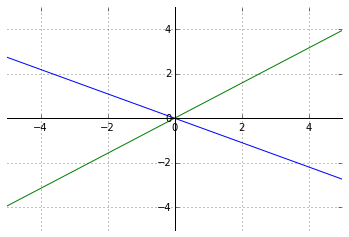

In [20]:
# <!-- collapse=True -->
# Solución gráfica.
x_vals = np.linspace(-5, 5, 50) # crea 50 valores entre 0 y 5

ax = move_spines()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid()

ax.plot(x_vals, (1.2 * x_vals) / -2.2) # grafica 1.2x_1 - 2.2x_2 = 0
a = ax.plot(x_vals, (1.1 * x_vals) / 1.4) # grafica 1.1x + 1.4x_2 = 0

Como podemos ver, tanto por la solución numérica como por la solución gráfica, estos vectores son *[linealmente independientes](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal)*, ya que la única solución a la ecuación $\alpha_1 x_1 + \alpha_2 x_2 + \dots + \alpha_n x_n = 0$, es aquella en que los <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a> son cero.

Determinemos ahora si por ejemplo, los siguientes [vectores](http://es.wikipedia.org/wiki/Vector) en $\mathbb{R}^4$ son *[linealmente independientes](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal)*: $\{(3, 2, 2, 3), (3, 2, 1, 2), (3, 2, 0, 1)\}$. Aquí, ahora deberíamos resolver la siguiente ecuación:

$$\alpha_1 (3, 2, 2, 3) +\alpha_2 (3, 2, 1, 2) + \alpha_3 (3, 2, 0, 1) = (0, 0, 0, 0)$$

Para resolver este sistema de ecuaciones que no es cuadrado (tiene 4 ecuaciones y solo 3 incógnitas); podemos utilizar [SymPy](http://www.sympy.org/es/).

In [21]:
# Sympy para resolver el sistema de ecuaciones lineales
a1, a2, a3 = sympy.symbols('a1, a2, a3')
A = sympy.Matrix(( (3, 3, 3, 0), (2, 2, 2, 0), (2, 1, 0, 0), (3, 2, 1, 0) ))
A

⎡3  3  3  0⎤
⎢          ⎥
⎢2  2  2  0⎥
⎢          ⎥
⎢2  1  0  0⎥
⎢          ⎥
⎣3  2  1  0⎦

In [22]:
sympy.solve_linear_system(A, a1, a2, a3)

{a₁: a₃, a₂: -2⋅a₃}

Como vemos, esta solución es *no trivial*, ya que por ejemplo existe la solución $\alpha_1 = 1, \ \alpha_2 = -2 , \  \alpha_3 = 1$ en la que los <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a> no son ceros. Por lo tanto este sistema es *[linealmente dependiente](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal)*.

Por último, podríamos considerar si los siguientes [polinomios](https://es.wikipedia.org/wiki/Polinomio) son *[linealmente independientes](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal)*: $1 -2x -x^2$, $1 + x$, $1 + x + 2x^2$. En este caso, deberíamos resolver la siguiente ecuación:

$$\alpha_1 (1 − 2x − x^2) + \alpha_2 (1 + x) + \alpha_3 (1 + x + 2x^2) = 0$$

y esta ecuación es equivalente a la siguiente:

$$(\alpha_1 + \alpha_2 + \alpha_3 ) + (−2 \alpha_1 + \alpha_2 + \alpha_3 )x + (−\alpha_1 + 2 \alpha_2 )x^2 = 0$$

Por lo tanto, podemos armar el siguiente [sistema de ecuaciones](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales):

$$\alpha_1 + \alpha_2 + \alpha_3 = 0, \\
-2 \alpha_1 + \alpha_2 + \alpha_3 = 0, \\
-\alpha_1 + 2 \alpha_2  = 0.
$$

El cual podemos nuevamente resolver con la ayuda de [SymPy](http://www.sympy.org/es/).

In [23]:
A = sympy.Matrix(( (1, 1, 1, 0), (-2, 1, 1, 0), (-1, 2, 0, 0) ))
A

⎡1   1  1  0⎤
⎢           ⎥
⎢-2  1  1  0⎥
⎢           ⎥
⎣-1  2  0  0⎦

In [24]:
sympy.solve_linear_system(A, a1, a2, a3)

{a₁: 0, a₂: 0, a₃: 0}

Como vemos, todos los <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalares</a> son ceros, por lo tanto estos [polinomios](https://es.wikipedia.org/wiki/Polinomio) son *[linealmente independientes](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal)*.

### Espacio nulo, espacio columna y espacio fila

Un termino particularmente relacionado con la [independencia lineal](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal) es el de <a href="https://es.wikipedia.org/wiki/N%C3%BAcleo_(matem%C3%A1tica)">espacio nulo o núcleo</a>. El <a href="https://es.wikipedia.org/wiki/N%C3%BAcleo_(matem%C3%A1tica)">espacio nulo</a> de una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$, el cual lo vamos a expresar como $N(A)$, va a consistir de todas las soluciones a la ecuación fundamental $Ax = 0$. Por supuesto, una solución inmediata a esta ecuación es el caso de $x = 0$, que ya vimos que establece la [independencia lineal](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal). Esta solución solo va a ser la única que exista para los casos de [matrices invertibles](https://es.wikipedia.org/wiki/Matriz_invertible). Pero en el caso de las matrices singulares (aquellas que no son [invertibles](https://es.wikipedia.org/wiki/Matriz_invertible), que tienen <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> igual a cero), van a existir soluciones que no son cero para la ecuación $Ax = 0$. El conjunto de todas estas soluciones, va a representar el <a href="https://es.wikipedia.org/wiki/N%C3%BAcleo_(matem%C3%A1tica)">espacio nulo</a>.

Para encontrar el <a href="https://es.wikipedia.org/wiki/N%C3%BAcleo_(matem%C3%A1tica)">espacio nulo</a> también nos podemos ayudar de [SymPy](http://www.sympy.org/es/).

In [25]:
# Espacio nulo de un matriz
A = sympy.Matrix(((1, 5, 7), (0, 0, 9)))
A

⎡1  5  7⎤
⎢       ⎥
⎣0  0  9⎦

In [26]:
# Calculando el espacio nulo
x = A.nullspace()
x

⎡⎡-5⎤⎤
⎢⎢  ⎥⎥
⎢⎢1 ⎥⎥
⎢⎢  ⎥⎥
⎣⎣0 ⎦⎦

In [27]:
# Comprobando la solución
A_aum = sympy.Matrix(((1, 5, 7, 0), (0, 0, 9, 0)))
sympy.solve_linear_system(A_aum, a1, a2, a3)

{a₁: -5⋅a₂, a₃: 0}

In [28]:
# Comprobación con numpy
A = np.array([[1, 5, 7],
               [0, 0, 9]])
x = np.array([[-5],
               [1], 
               [0]])

A.dot(x)

array([[0],
       [0]])

Otro espacio de suma importancia es el [espacio columna](https://es.wikipedia.org/wiki/Subespacios_fundamentales_de_una_matriz). El [espacio columna](https://es.wikipedia.org/wiki/Subespacios_fundamentales_de_una_matriz), $C(A)$, consiste en todas las [combinaciones lineales](https://es.wikipedia.org/wiki/Combinaci%C3%B3n_lineal) de las columnas de una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$. Estas combinaciones son los posibles vectores $Ax$. Este espacio es fundamental para resolver la ecuación $Ax = b$; ya que para resolver esta ecuación debemos expresar a $b$ como una combinación de columnas. El sistema $Ax = b$, va a tener solución solamente si $b$ esta en el espacio columna de $A$. Como las <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matrices</a> tienen la forma $m \times n$, sus columnas tienen $m$ componentes ($n$ son las filas). Por lo tanto el [espacio columna](https://es.wikipedia.org/wiki/Subespacios_fundamentales_de_una_matriz) es un *subespacio* de $\mathbb{R}^m$ y no $\mathbb{R}^n$.

Por último, el otro espacio que conforma los [espacios fundamentales](https://es.wikipedia.org/wiki/Subespacios_fundamentales_de_una_matriz) de una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a>, es el [espacio fila](https://es.wikipedia.org/wiki/Subespacios_fundamentales_de_una_matriz), el cual esta constituido por las [combinaciones lineales](https://es.wikipedia.org/wiki/Combinaci%C3%B3n_lineal) de las filas de una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a>.

Para obtener estos espacios, nuevamente podemos recurrir a [SymPy](http://www.sympy.org/es/). Para poder obtener estos espacios, primero vamos a tener que obtener la [forma escalonada](https://es.wikipedia.org/wiki/Matriz_escalonada) de la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a>, la cual es la forma a la que arribamos luego del proceso de [eliminación](https://es.wikipedia.org/wiki/Eliminaci%C3%B3n_de_Gauss-Jordan).

In [29]:
# A.rref() forma escalonada.
A = sympy.Matrix( [[2,-3,-8, 7],
                   [-2,-1,2,-7],
                   [1 ,0,-3, 6]])

A.rref() # [0, 1, 2] es la ubicación de las pivot.

⎛⎡1  0  0  0 ⎤, [0, 1, 2]⎞
⎜⎢           ⎥           ⎟
⎜⎢0  1  0  3 ⎥           ⎟
⎜⎢           ⎥           ⎟
⎝⎣0  0  1  -2⎦           ⎠

In [30]:
# Espacio columna
[ A[:,c] for c in A.rref()[1] ]

⎡⎡2 ⎤, ⎡-3⎤, ⎡-8⎤⎤
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢-2⎥  ⎢-1⎥  ⎢2 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣1 ⎦  ⎣0 ⎦  ⎣-3⎦⎦

In [31]:
# Espacio fila
[ A.rref()[0][r,:] for r in A.rref()[1] ]

[[1  0  0  0], [0  1  0  3], [0  0  1  -2]]

## Rango

Otro concepto que también esta ligado a la [independencia lineal](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal) es el de <a href="https://es.wikipedia.org/wiki/Rango_(%C3%A1lgebra_lineal)">rango</a>. Los números de columnas $m$ y filas $n$ pueden darnos el tamaño de una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a>, pero esto no necesariamente representa el verdadero tamaño del [sistema lineal](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales), ya que por ejemplo si existen dos filas iguales en una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$, la segunda fila desaparecía en el proceso de [eliminación](https://es.wikipedia.org/wiki/Eliminaci%C3%B3n_de_Gauss-Jordan). El verdadero tamaño de $A$ va a estar dado por su <a href="https://es.wikipedia.org/wiki/Rango_(%C3%A1lgebra_lineal)">rango</a>. El <a href="https://es.wikipedia.org/wiki/Rango_(%C3%A1lgebra_lineal)">rango</a> de una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> es el número máximo de columnas (filas respectivamente) que son [linealmente independientes](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal). Por ejemplo si tenemos la siguiente <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> de 3 x 4:

$$A = \begin{bmatrix}1 & 1 & 2 & 4\\1 & 2 & 2 & 5
\\ 1 & 3 & 2 & 6\end{bmatrix}$$

Podemos ver que la tercer columna $(2, 2, 2)$ es un múltiplo de la primera y que la cuarta columna $(4, 5, 6)$ es la suma de las primeras 3 columnas. Por tanto el <a href="https://es.wikipedia.org/wiki/Rango_(%C3%A1lgebra_lineal)">rango</a> de $A$ va a ser igual a 2; ya que la tercer y cuarta columna pueden ser eliminadas.

Obviamente, el <a href="https://es.wikipedia.org/wiki/Rango_(%C3%A1lgebra_lineal)">rango</a> también lo podemos calcular con la ayuda de [Python](http://python.org/).

In [32]:
# Calculando el rango con SymPy
A = sympy.Matrix([[1, 1, 2, 4],
                  [1, 2, 2, 5],
                  [1, 3, 2, 6]])
A

⎡1  1  2  4⎤
⎢          ⎥
⎢1  2  2  5⎥
⎢          ⎥
⎣1  3  2  6⎦

In [33]:
# Rango con SymPy
A.rank()

2

In [34]:
# Rango con numpy
A = np.array([[1, 1, 2, 4],
              [1, 2, 2, 5],
              [1, 3, 2, 6]])
np.linalg.matrix_rank(A)

2

Una útil aplicación de calcular el <a href="https://es.wikipedia.org/wiki/Rango_(%C3%A1lgebra_lineal)">rango</a> de una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> es la de determinar el número de soluciones al [sistema de ecuaciones lineales](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales), de acuerdo al enunciado del [Teorema de Rouché–Frobenius](https://es.wikipedia.org/wiki/Teorema_de_Rouch%C3%A9%E2%80%93Frobenius). El sistema tiene por lo menos una solución si el <a href="https://es.wikipedia.org/wiki/Rango_(%C3%A1lgebra_lineal)">rango</a> de la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> de coeficientes equivale al <a href="https://es.wikipedia.org/wiki/Rango_(%C3%A1lgebra_lineal)">rango</a> de la [matriz aumentada](https://es.wikipedia.org/wiki/Matriz_aumentada). En ese caso, ésta tiene exactamente una solución si el rango equivale al número de incógnitas.

## La norma y la Ortogonalidad

Si quisiéramos saber cual es el *largo* del un [vector](http://es.wikipedia.org/wiki/Vector), lo único que necesitamos es el famoso [teorema de Pitágoras](https://es.wikipedia.org/wiki/Teorema_de_Pit%C3%A1goras). En el plano $\mathbb{R}^2$, el *largo* de un [vector](http://es.wikipedia.org/wiki/Vector) $v=\begin{bmatrix}a \\ b \end{bmatrix}$ va a ser igual a la distancia desde el origen $(0, 0)$ hasta el punto $(a, b)$. Esta distancia puede ser fácilmente calculada gracias al [teorema de Pitágoras](https://es.wikipedia.org/wiki/Teorema_de_Pit%C3%A1goras) y va ser igual a $\sqrt{a^2 + b^2}$, como se puede ver en la siguiente figura:

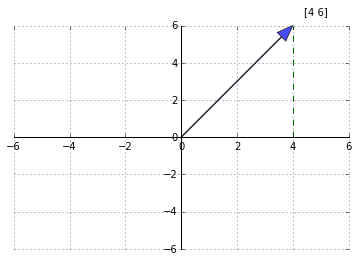

In [35]:
# <!-- collapse=True -->
# Calculando largo de un vector
# forma un triángulo rectángulo

ax = move_spines()
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.grid()
v = np.array([4, 6])

vect_fig(v, "blue")

a = ax.vlines(x=v[0], ymin=0, ymax = 6, linestyle='--', color='g')

En esta definición podemos observar que $a^2 + b^2 = v \cdot v$, por lo que ya estamos en condiciones de poder definir lo que en [Álgebra lineal](http://relopezbriega.github.io/tag/algebra.html) se conoce como [norma](https://es.wikipedia.org/wiki/Norma_vectorial).

El *largo* o [norma](https://es.wikipedia.org/wiki/Norma_vectorial) de un [vector](http://es.wikipedia.org/wiki/Vector) $v = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}$, en $\mathbb{R}^n$ va a ser igual a un número no negativo $||v||$ definido por:

$$||v|| = \sqrt{v \cdot v} = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}$$

Es decir que la [norma](https://es.wikipedia.org/wiki/Norma_vectorial) de un [vector](http://es.wikipedia.org/wiki/Vector) va a ser igual a la raíz cuadrada de la suma de los cuadrados de sus componentes.

### Ortogonalidad

El concepto de [perpendicularidad](https://es.wikipedia.org/wiki/Perpendicularidad) es fundamental en [geometría](https://es.wikipedia.org/wiki/Geometr%C3%ADa). Este concepto llevado a los [vectores](http://es.wikipedia.org/wiki/Vector) en $\mathbb{R}^n$ se llama <a href="https://es.wikipedia.org/wiki/Ortogonalidad_(matem%C3%A1ticas)">ortogonalidad</a>.

Dos [vectores](http://es.wikipedia.org/wiki/Vector) $v$ y $w$ en $\mathbb{R}^n$ van a ser <a href="https://es.wikipedia.org/wiki/Ortogonalidad_(matem%C3%A1ticas)">ortogonales</a> el uno al otro si su [producto interior](https://es.wikipedia.org/wiki/Producto_escalar) es igual a cero. Es decir, $v \cdot w = 0$.

Geométricamente lo podemos ver de la siguiente manera:

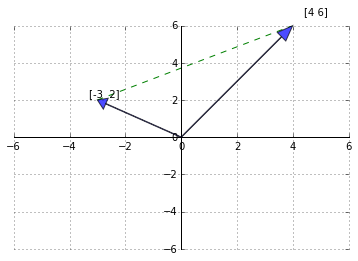

In [36]:
# <!-- collapse=True -->
# Vectores ortogonales

ax = move_spines()
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.grid()
vecs = [np.array([4, 6]), np.array([-3, 2])]

for v in vecs:
    vect_fig(v, "blue")

a = ax.plot([-3, 4], [2, 6], linestyle='--', color='g')

In [37]:
# comprobando su producto interior.
v = np.array([4, 6])
w = np.array([-3, 2])
v.dot(w)

0

Un [conjunto](http://relopezbriega.github.io/blog/2015/10/11/conjuntos-con-python/) de [vectores](http://es.wikipedia.org/wiki/Vector) en $\mathbb{R}^n$ va a ser <a href="https://es.wikipedia.org/wiki/Ortogonalidad_(matem%C3%A1ticas)">ortogonal</a> si todo los pares de los distintos [vectores](http://es.wikipedia.org/wiki/Vector) en el [conjunto](http://relopezbriega.github.io/blog/2015/10/11/conjuntos-con-python/) son <a href="https://es.wikipedia.org/wiki/Ortogonalidad_(matem%C3%A1ticas)">ortogonales</a> entre sí. O sea:

$v_i \cdot v_j = 0$ para todo $i, j = 1, 2, \dots, k$ y donde $i \ne j$.

Por ejemplo, si tenemos el siguiente [conjunto](http://relopezbriega.github.io/blog/2015/10/11/conjuntos-con-python/) de [vectores](http://es.wikipedia.org/wiki/Vector) en $\mathbb{R}^3$:

$$v1 = \begin{bmatrix} 2 \\ 1 \\ -1\end{bmatrix} \ 
v2 = \begin{bmatrix} 0 \\ 1 \\ 1\end{bmatrix} \
v3 = \begin{bmatrix} 1 \\ -1 \\ 1\end{bmatrix}$$

En este caso, deberíamos combrobar que:

$$v1 \cdot v2 = 0 \\
v2 \cdot v3 = 0 \\
v1 \cdot v3 = 0 $$

In [38]:
# comprobando ortogonalidad del conjunto

v1 = np.array([2, 1, -1])
v2 = np.array([0, 1, 1])
v3 = np.array([1, -1, 1])

v1.dot(v2), v2.dot(v3), v1.dot(v3)

(0, 0, 0)

Como vemos, este conjunto es <a href="https://es.wikipedia.org/wiki/Ortogonalidad_(matem%C3%A1ticas)">ortogonal</a>. Una de las principales ventajas de trabajar con [conjuntos](http://relopezbriega.github.io/blog/2015/10/11/conjuntos-con-python/) de [vectores](http://es.wikipedia.org/wiki/Vector) <a href="https://es.wikipedia.org/wiki/Ortogonalidad_(matem%C3%A1ticas)">ortogonales</a> es que los mismos son necesariamente [linealmente independientes](https://es.wikipedia.org/wiki/Dependencia_e_independencia_lineal).

El concepto de <a href="https://es.wikipedia.org/wiki/Ortogonalidad_(matem%C3%A1ticas)">ortogonalidad</a> es uno de los más importantes y útiles en [Álgebra lineal](http://relopezbriega.github.io/tag/algebra.html) y surge en muchas situaciones prácticas, sobre todo cuando queremos calcular distancias.

## Determinante

El <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> es un número especial que puede calcularse sobre las [matrices cuadradas](https://es.wikipedia.org/wiki/Matriz_cuadrada). Este número nos va a decir muchas cosas sobre la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a>. Por ejemplo, nos va decir si la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> es [invertible](https://es.wikipedia.org/wiki/Matriz_invertible) o no. Si el <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> es igual a cero, la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> no es [invertible](https://es.wikipedia.org/wiki/Matriz_invertible). Cuando la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> es [invertible](https://es.wikipedia.org/wiki/Matriz_invertible), el <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> de $A^{-1}= 1/(\det \ A)$. El <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> también puede ser útil para calcular áreas.

Para obtener el <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> de una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> debemos calcular la suma de los productos de las diagonales de la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> en una dirección menos la suma de los productos de las diagonales en la otra dirección. Se represente con el símbolo $|A|$ o $\det A$.

Algunas de sus propiedades que debemos tener en cuenta son:

a. El <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> de la [matriz identidad](https://es.wikipedia.org/wiki/Matriz_identidad) es igual a 1. $\det I = 1$.

b. Una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$ es *singular* (no tiene [inversa](https://es.wikipedia.org/wiki/Matriz_invertible)) si su <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> es igual a cero. 

c. El <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> cambia de signo cuando dos columnas(o filas) son intercambiadas.

d. Si dos filas de una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$ son iguales, entonces el <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> es cero.

e. Si alguna fila de la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$ son todos ceros, entonces el <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> es cero.

f. La [matriz transpuesta](http://es.wikipedia.org/wiki/Matriz_transpuesta) $A^T$, tiene el mismo <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> que $A$.

g. El <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> de $AB$ es igual al <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> de $A$ multiplicado por el <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> de $B$. $\det (AB) = \det A \cdot \det B$.

h. El <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> es una [función lineal](https://es.wikipedia.org/wiki/Funci%C3%B3n_lineal) de cada una de las filas en forma separada. Si multiplicamos solo una fila por $\alpha$, entonces el <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> también es multiplicado por $\alpha$.

Veamos como podemos obtener el <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> con la ayuda de [Python](http://python.org/)

In [39]:
# Determinante con sympy
A = sympy.Matrix( [[1, 2, 3],
                   [2,-2, 4],
                   [2, 2, 5]] )
A.det()

2

In [40]:
# Determinante con numpy
A = np.array([[1, 2, 3],
              [2,-2, 4],
              [2, 2, 5]] )
np.linalg.det(A)

2.0

In [41]:
# Determinante como funcion lineal de fila
A[0] = A[0:1]*5
np.linalg.det(A)

10.0

In [42]:
# cambio de signo de determinante
A = sympy.Matrix( [[2,-2, 4],
                   [1, 2, 3],
                   [2, 2, 5]] )
A.det()

-2

## Eigenvalores y Eigenvectores

Cuando estamos resolviendo [ecuaciones lineales](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales) del tipo $Ax = b$, estamos trabajando con problemas *estáticos*. ¿Pero qué pasa si quisiéramos trabajar con problemas *dinámicos*?. Es en este tipo de situaciones donde los [Eigenvalores y Eigenvectores](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio) tienen su mayor importancia.

Supongamos que tenemos una [matriz cuadrada](https://es.wikipedia.org/wiki/Matriz_cuadrada) $A$ de $n \times n$. Una pregunta natural que nos podríamos hacer sobre $A$ es: ¿Existe algún [vector](http://es.wikipedia.org/wiki/Vector) $x$ distinto de cero para el cual $Ax$ es un <a href="http://es.wikipedia.org/wiki/Escalar_(matem%C3%A1tica)">escalar</a> múltiplo de $x$?. Si llevamos esta pregunta al lenguaje matemático nos vamos a encontrar con la siguiente ecuación:

$$Ax = \lambda x$$

Cuando esta ecuación es válida y $x$ no es cero, decimos que $\lambda$ es el [Eigenvalor o valor propio](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio) de $A$ y $x$ es su correspondiente [Eigenvector o vector propio](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio).

Muchos problemas en ciencia derivan en problemas de [Eigenvalores](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio), en los cuales la principal pregunta es: ¿Cuáles son los [Eigenvalores](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio) de una <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> dada, y cuáles son sus correspondientes [Eigenvectores](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio). Un área donde nos va a ser de mucha utilidad esta teoría, es en problemas con sistemas de [ecuaciones diferenciales lineales](https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_diferencial_lineal).

### Calculando Eigenvalores 

Hasta aquí todo muy bien, pero dada una [matriz cuadrada](https://es.wikipedia.org/wiki/Matriz_cuadrada) $A$ de $n \times n$, ¿cómo podemos obtener sus [Eigenvalores](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio)?. 

Podemos comenzar por observar que la ecuación $Ax = \lambda x$ es equivalente a $(A - \lambda I)x = 0$. Dado que estamos interesados en soluciones a esta ecuación que sean distintas de cero, la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A - \lambda I$ debe ser *singular*, no [invertible](https://es.wikipedia.org/wiki/Matriz_invertible), por lo tanto su <a href="https://es.wikipedia.org/wiki/Determinante_(matem%C3%A1tica)">determinante</a> debe ser cero, $\det (A - \lambda I) = 0$. De esta forma, podemos utilizar esta ecuación para encontrar los [Eigenvalores](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio) de $A$. Particularmente, podríamos formar el [polinomio característico](https://es.wikipedia.org/wiki/Polinomio_caracter%C3%ADstico) de la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$, el cual va a tener *grado* $n$ y por lo tanto va a tener $n$ soluciones, es decir que vamos a encontrar $n$ [Eigenvalores](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio). 
Algo que debemos tener en cuenta es, que a pesar de que la <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a> $A$ sea [real](https://es.wikipedia.org/wiki/N%C3%BAmero_real), debemos estar preparados para encontrar [Eigenvalores](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio) que sean [complejos](http://relopezbriega.github.io/blog/2015/10/12/numeros-complejos-con-python/).

Para que quede más claro, veamos un ejemplo de como podemos calcular los [Eigenvalores](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio). Supongamos que tenemos la siguiente <a href="https://es.wikipedia.org/wiki/Matriz_(matem%C3%A1ticas)">matriz</a>:

$$A = \begin{bmatrix} 3 & 2 \\ 7 & -2 \end{bmatrix}$$

Su [polinomio característico](https://es.wikipedia.org/wiki/Polinomio_caracter%C3%ADstico) va a ser igual a:

$$p(\lambda) = \det (A - \lambda I) = \det \begin{bmatrix}3 - \lambda & 2 \\ 7  & -2-\lambda\end{bmatrix} = (3 - \lambda)(-2-\lambda) - 14  \\ =\lambda^2 - \lambda - 20 = (\lambda - 5) (\lambda + 4)$$

Por lo tanto los [Eigenvalores](https://es.wikipedia.org/wiki/Vector_propio_y_valor_propio) de $A$ van a ser $5$ y $-4$.

Obviamente, también los podemos obtener mucho más fácilmente con la ayuda de [Python](http://python.org/).

In [43]:
# Eigenvalores con numpy
A = np.array([[3, 2],
              [7, -2]])

x, v = np.linalg.eig(A)

# x Eigenvalor, v Eigenvector
x, v

(array([ 5., -4.]), array([[ 0.70710678, -0.27472113],
        [ 0.70710678,  0.96152395]]))

In [44]:
# Eigenvalores con SymPy
A = sympy.Matrix([[3, 2],
                  [7, -2]])

# Eigenvalor
A.eigenvals()

{-4: 1, 5: 1}

In [45]:
# Eigenvector
A.eigenvects()

⎡⎛-4, 1, ⎡⎡-2/7⎤⎤⎞, ⎛5, 1, ⎡⎡1⎤⎤⎞⎤
⎢⎜       ⎢⎢    ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣ 1  ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

In [46]:
# comprobando la solución Ax = λx
# x eigenvector, v eigenvalue
x = A.eigenvects()[0][2][0]
v = A.eigenvects()[0][0]

# Ax == vx
A*x, v*x

⎛⎡8/7⎤, ⎡8/7⎤⎞
⎜⎢   ⎥  ⎢   ⎥⎟
⎝⎣-4 ⎦  ⎣-4 ⎦⎠

Con esto termino con este recorrido por los principales conceptos del [Álgebra lineal](http://relopezbriega.github.io/tag/algebra.html), muchos de los cuales veremos en próximos artículos que tienen muchas aplicaciones interesantes. Espero que les sea de utilidad y les sirva de referencia.

Saludos!

*Este post fue escrito utilizando Jupyter notebook. Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/pyLinearAlgrebra.ipynb) o ver su version estática en [nbviewer](http://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/pyLinearAlgrebra.ipynb).*